# Identify first incidence of cavity becoming cold

Use parameter "Birgit" B = a*S + c

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.projects.evaluation import TS_diagrams_Amundsen
from nemo_python_git.grid import extract_var_region
from nemo_python_git.plots import plot_ts_distribution

In [218]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
run_folder    = f'{base_dir}output/ERA5_test5/new_ICs_w_icb_rn_htbl_20/files/'
# run_folder    = f'{base_dir}output/simple-eANT025-test/files/'
nemo_mesh     = f'{base_dir}bathymetry/mesh_mask-20240305.nc'
nemo_domain   = f'{base_dir}bathymetry/domain_cfg-20240305.nc'

In [85]:
nemo_mesh_ds  = xr.open_dataset(nemo_mesh).isel(time_counter=0)
nemo_mesh_sub = nemo_mesh_ds #.isel(x=slice(500, 880), y=slice(150,300))

bathy = xr.where((nemo_mesh_sub.isfdraft > 0) | (nemo_mesh_sub.bathy_metry==0), np.nan, nemo_mesh_sub.bathy_metry)

### Define the assessment criteria

In [86]:
files = glob.glob(f'{run_folder}eANT025.L121_1d_19790101_19791231_grid_T_1979*')
ds    = xr.open_dataset(files[60]).rename({'x_grid_T':'x','y_grid_T':'y'})
# ds    = ds.rename({'x_grid_T':'x', 'y_grid_T':'y'}).isel(x=slice(600, 760), y=slice(200,250))
# land  = xr.where(ds.thetao.isel(deptht=57) == 0.0, 1, np.nan)

In [ ]:
TS_diagrams_Amundsen(run_folder, file_ind=0, return_fig=False, show_obs=False, \
                     smin=30, smax=35.25, tmin=-3, tmax=2.25, nbins=100)

In [ ]:
fig, ax = TS_diagrams_Amundsen(run_folder, file_ind=10, return_fig=True, show_obs=False, \
                               smin=30, smax=35.25, tmin=-3, tmax=2.25, nbins=250)

In [ ]:
fig, ax = TS_diagrams_Amundsen(run_folder, file_ind=20, return_fig=True, show_obs=False, \
                               smin=30, smax=35.25, tmin=-3, tmax=2.25, nbins=250)

In [ ]:
fig, ax = TS_diagrams_Amundsen(run_folder, file_ind=30, return_fig=True, show_obs=False, \
                               smin=30, smax=35.25, tmin=-3, tmax=2.25, nbins=250)

In [ ]:
fig, ax = TS_diagrams_Amundsen(run_folder, file_ind=40, return_fig=True, show_obs=False, \
                               smin=30, smax=35.25, tmin=-3, tmax=2.25, nbins=250)

In [ ]:
fig, ax = TS_diagrams_Amundsen(run_folder, file_ind=50, return_fig=True, show_obs=False, \
                               smin=30, smax=35.25, tmin=-3, tmax=2.25, nbins=250)

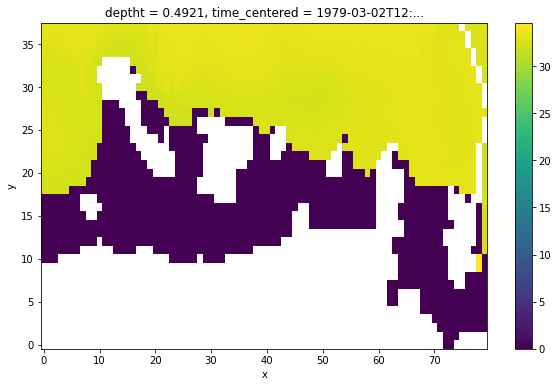

In [76]:
amundsen_salt.isel(time_counter=0, deptht=0).plot(figsize=(10,6))

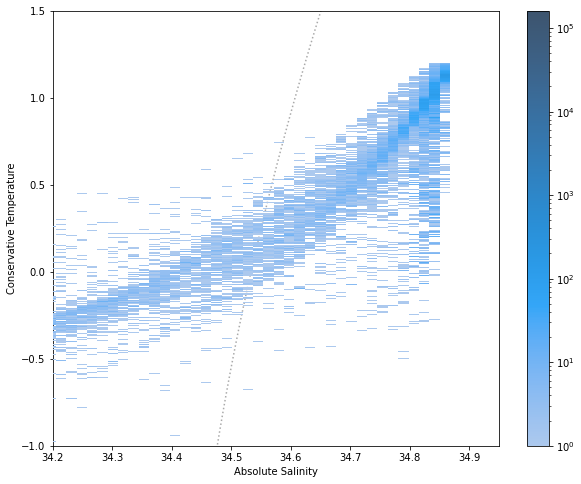

In [77]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
smin = 31.8; smax=35; tmin=-1.5; tmax=1.8;
nbins= 2000
plot_ts_distribution(ax, amundsen_salt.values.flatten(), amundsen_temp.values.flatten(), plot_density=True, plot_freeze=True, 
                     bins=nbins, smin=smin, smax=smax, tmin=tmin, tmax=tmax)

ax.set_xlim(34.2,34.95); ax.set_ylim(-1,1.5);

In [91]:
def load_am_TS(file_ind):
    files = glob.glob(f'{run_folder}eANT025.L121_1d_19790101_19791231_grid_T_1979*')
    ds    = xr.open_dataset(files[file_ind]).rename({'x_grid_T':'x','y_grid_T':'y'})
    
    amundsen_so = extract_var_region(ds, 'so'    , 'amundsen_sea')
    amundsen_to = extract_var_region(ds, 'thetao', 'amundsen_sea')
    
    # drop NaN values
    am_salt = amundsen_so.where(~np.isnan(amundsen_so) | ~np.isnan(amundsen_to), drop=True).isel(x=slice(110,190), y=slice(24,74))
    am_temp = amundsen_to.where(~np.isnan(amundsen_so) | ~np.isnan(amundsen_to), drop=True).isel(x=slice(110,190), y=slice(24,74))
    
    amundsen_salt = am_salt.where((~np.isnan(am_salt))*(~np.isnan(am_temp)), drop=True)
    amundsen_temp = am_temp.where((~np.isnan(am_salt))*(~np.isnan(am_temp)), drop=True)
    
    return amundsen_salt, amundsen_temp

/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test5/new_ICs_w_icb_rn_htbl_20/files/eANT025.L121_1d_19790101_19791231_grid_T_19790101-19790101.nc
/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test5/new_ICs_w_icb_rn_htbl_20/files/eANT025.L121_1d_19790101_19791231_grid_T_19790131-19790131.nc


(-0.5, 1.5)

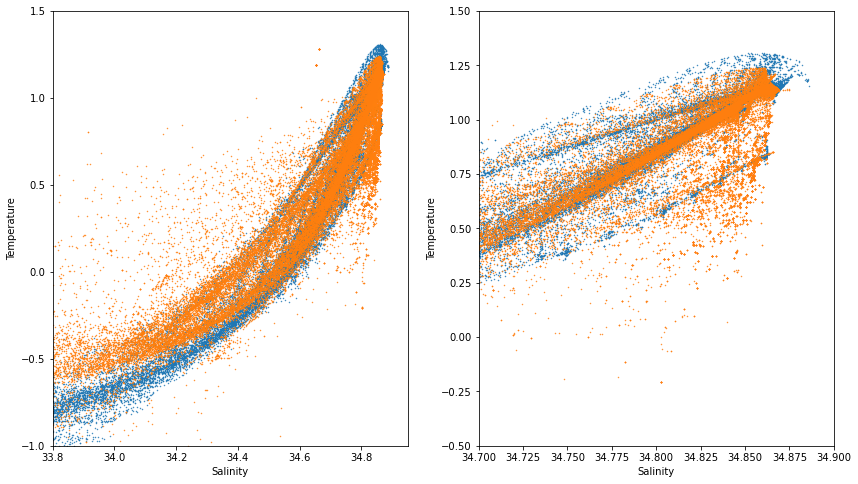

In [114]:
amundsen_salt1, amundsen_temp1 = load_am_TS(0)
amundsen_salt2, amundsen_temp2 = load_am_TS(30)

fig, ax = plt.subplots(1,2, figsize=(14,8))

for axis in ax.ravel():
    axis.scatter(amundsen_salt1, amundsen_temp1, s=0.2)
    axis.scatter(amundsen_salt2, amundsen_temp2, s=0.2)
    axis.set_xlabel('Salinity')
    axis.set_ylabel('Temperature')
    
ax[0].set_xlim(33.8,34.95)
ax[0].set_ylim(-1.0,1.5)
ax[1].set_xlim(34.7,34.9)
ax[1].set_ylim(-0.5,1.5)

/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test5/new_ICs_w_icb_rn_htbl_20/files/eANT025.L121_1d_19790101_19791231_grid_T_19790101-19790101.nc
/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test5/new_ICs_w_icb_rn_htbl_20/files/eANT025.L121_1d_19790101_19791231_grid_T_19790210-19790210.nc


(-0.5, 1.5)

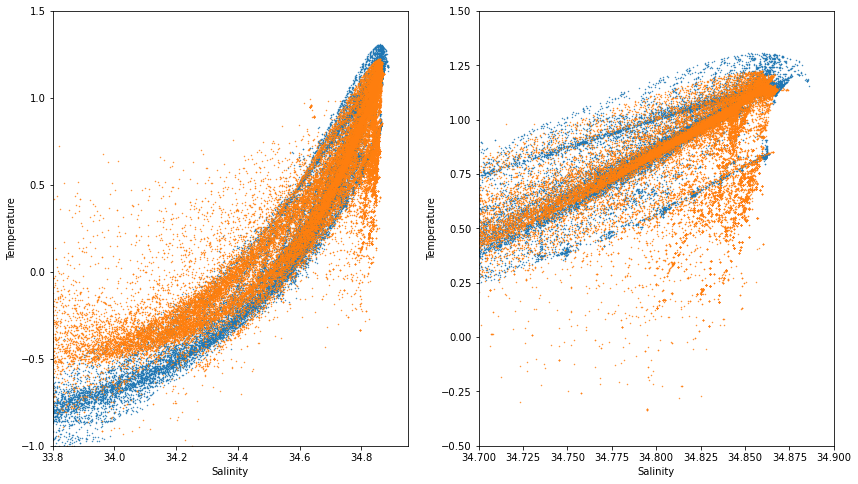

In [115]:
amundsen_salt1, amundsen_temp1 = load_am_TS(0)
amundsen_salt2, amundsen_temp2 = load_am_TS(40)

fig, ax = plt.subplots(1,2, figsize=(14,8))

for axis in ax.ravel():
    axis.scatter(amundsen_salt1, amundsen_temp1, s=0.2)
    axis.scatter(amundsen_salt2, amundsen_temp2, s=0.2)
    axis.set_xlabel('Salinity')
    axis.set_ylabel('Temperature')
    
ax[0].set_xlim(33.8,34.95)
ax[0].set_ylim(-1.0,1.5)
ax[1].set_xlim(34.7,34.9)
ax[1].set_ylim(-0.5,1.5)

(-0.5, 1.5)

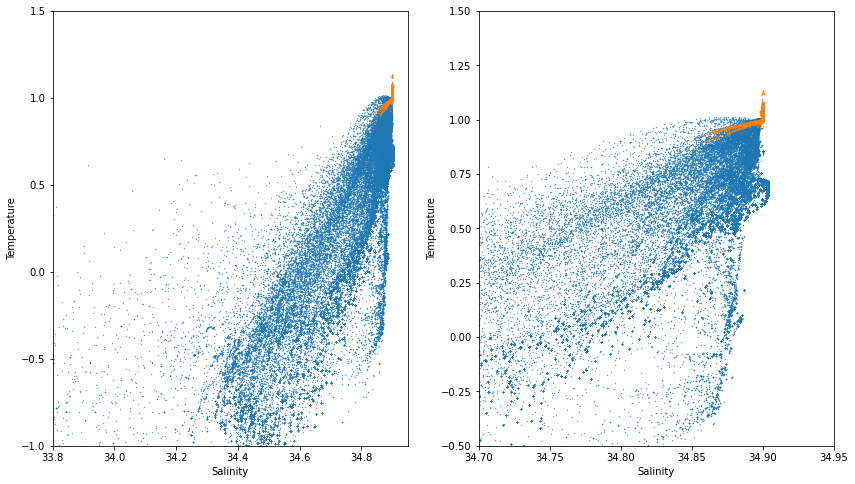

In [89]:
amundsen_salt1, amundsen_temp1 = load_am_TS(0)
amundsen_salt2, amundsen_temp2 = load_am_TS(100)

fig, ax = plt.subplots(1,2, figsize=(14,8))

for axis in ax.ravel():
    axis.scatter(amundsen_salt2, amundsen_temp2, s=0.1)
    axis.scatter(amundsen_salt1, amundsen_temp1, s=0.1)
    axis.set_xlabel('Salinity')
    axis.set_ylabel('Temperature')
    
ax[0].set_xlim(33.8,34.95)
ax[0].set_ylim(-1.0,1.5)
ax[1].set_xlim(34.7,34.95)
ax[1].set_ylim(-0.5,1.5)

(-0.5, 1.5)

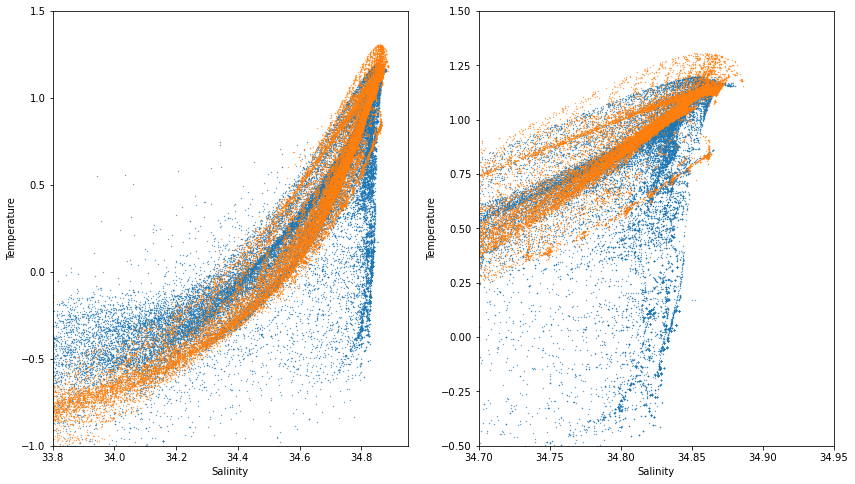

In [92]:
amundsen_salt1, amundsen_temp1 = load_am_TS(0)
amundsen_salt2, amundsen_temp2 = load_am_TS(100)

fig, ax = plt.subplots(1,2, figsize=(14,8))

for axis in ax.ravel():
    axis.scatter(amundsen_salt2, amundsen_temp2, s=0.1)
    axis.scatter(amundsen_salt1, amundsen_temp1, s=0.1)
    axis.set_xlabel('Salinity')
    axis.set_ylabel('Temperature')
    
ax[0].set_xlim(33.8,34.95)
ax[0].set_ylim(-1.0,1.5)
ax[1].set_xlim(34.7,34.95)
ax[1].set_ylim(-0.5,1.5)

/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test5/new_ICs_w_icb_rn_htbl_20/files/eANT025.L121_1d_19790101_19791231_grid_T_19790101-19790101.nc
/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test5/new_ICs_w_icb_rn_htbl_20/files/eANT025.L121_1d_19790101_19791231_grid_T_19790411-19790411.nc


(-0.5, 1.5)

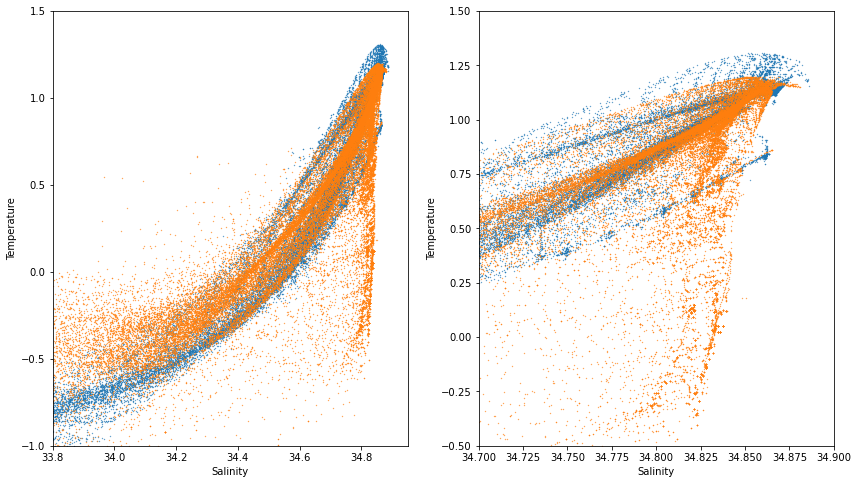

In [173]:
amundsen_salt1, amundsen_temp1 = load_am_TS(0)
amundsen_salt2, amundsen_temp2 = load_am_TS(100)

fig, ax = plt.subplots(1,2, figsize=(14,8))

for axis in ax.ravel():
    axis.scatter(amundsen_salt1, amundsen_temp1, s=0.1)
    axis.scatter(amundsen_salt2, amundsen_temp2, s=0.1)
    axis.set_xlabel('Salinity')
    axis.set_ylabel('Temperature')
    
ax[0].set_xlim(33.8,34.95)
ax[0].set_ylim(-1.0,1.5)
ax[1].set_xlim(34.7,34.9)
ax[1].set_ylim(-0.5,1.5)

In [5]:
# now, let's define a mixing line
WW_S = 34.2
WW_T = -1

CDW_S = 34.85
CDW_T = 1.2

# identify incidence of cavity becoming cold:
Sgrid = np.linspace(0,35,100)

slope  = (CDW_T-WW_T)/(CDW_S-WW_S) #1/0.5
Birgit = -34.67*slope
Tgrid  = slope*Sgrid + Birgit

In [73]:
prev_occur = []
pers_occur = [] # persistent

amundsen_salt1, amundsen_temp1 = load_am_TS(5)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0) 

occurrences= np.argwhere((amundsen_B < Birgit).values)

if (amundsen_B < Birgit).sum() > 0:
    if prev_occur == []:
        prev_occur = occurrences
    else:
        for case in occurrences:
            if list(case) in prev_occur.tolist():
                if list(case) not in [pers_occur.tolist()]:
                    pers_occur = np.vstack((pers_occur, case))
    
# prev_occurences = occurrences

In [65]:
if [2, 75, 51] in [[2, 75, 51]]:
    print('yes')

yes


In [74]:
pers_occur

[]

In [47]:
c = (prev_occurences.tolist()).append(prev_occurences[0].tolist())

In [48]:
print(c)

None


In [244]:
for a in range(0,5):
    if b[a] in np.argwhere((amundsen_B < Birgit).values).tolist():
    print('yes')

yes


In [256]:
# for each occurrence check if it persisted for more than one timestep
for ind in range(0,len(occurrences)):
if list(b[0]) in b[0:].tolist():
    print('yes', b[0])
else:
    print('no')

np.unique()

yes [ 2 75 51]


In [262]:
prev_occurrences = occurrences[0:2]
occurrences = np.argwhere((amundsen_B < Birgit).values)

In [265]:
occurrences

array([[ 2, 75, 51],
       [ 2, 78, 36],
       [ 2, 78, 37],
       [ 2, 78, 38],
       [ 2, 78, 39],
       [ 5, 70, 60],
       [ 5, 75, 43],
       [11, 15, 46],
       [11, 34, 56],
       [13, 26, 51],
       [13, 26, 52],
       [14, 26, 51],
       [14, 26, 52],
       [14, 55, 53],
       [20, 19, 49],
       [20, 19, 50],
       [21, 40, 46],
       [24, 39, 41]])

In [263]:
# check if the new occurrences existed previously
for case in occurrences:
    # check if it was also present in the previuos occurrences:
    if list(case) in prev_occurrences.tolist():
        prev_occurrences = np.append(prev_occurrences, case)

In [77]:
pers_occur = np.array([])

In [79]:
if pers_occur.size == 0:
    print('yes')

yes


In [83]:
prev_occur = np.array([])
pers_occur = np.array([]) # persistent

for time_ind in range(0,7):
    print('Time ind: ', time_ind)
    amundsen_salt1, amundsen_temp1 = load_am_TS(time_ind)
    amundsen_B  = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0) 
    occurrences = np.argwhere((amundsen_B < Birgit).values)

    if (amundsen_B < Birgit).sum() != 0:
        if prev_occur.size == 0:
            prev_occur = occurrences
        else:
            for case in occurrences:
                if list(case) in prev_occur.tolist():
                    if list(case) not in [pers_occur.tolist()]:
                        if pers_occur.size == 0:
                            print('first add ', case)
                            pers_occur = case
                        else:
                            print('add ', case)
                            pers_occur = np.vstack((pers_occur, case))
    
# prev_occurences = occurrences

Time ind:  0
Time ind:  1
Time ind:  2
Time ind:  3
first add  [ 2 75 51]
Time ind:  4
Time ind:  5
Time ind:  6


In [81]:
for time_ind in range(0,100):
    amundsen_salt1, amundsen_temp1 = load_am_TS(time_ind)

    amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
    
    if (amundsen_B < Birgit).sum() != 0:
        occurrences = np.argwhere((amundsen_B < Birgit).values)
        print('Occurence at time index: ', time_ind)
        print('number of points with negative B: ', (amundsen_B < Birgit).sum().values)
        print('coords: ', occurrences)
        print('-----------------')
    
    
        # print('number of points with positive B: ', sum(amundsen_B >= Birgit))

array([ 2, 75, 51])

In [219]:
def load_am_TS(file_ind):
    files = glob.glob(f'{run_folder}eANT025.L121_1d_19790101_19791231_grid_T_1979*')
    ds    = xr.open_dataset(files[file_ind]).rename({'x_grid_T':'x','y_grid_T':'y'})
    
    amundsen_so = extract_var_region(ds, 'so'    , 'amundsen_sea')
    amundsen_to = extract_var_region(ds, 'thetao', 'amundsen_sea')
    
    # drop NaN values
    am_salt = amundsen_so.isel(x=slice(615,710), y=slice(205,240))
    am_temp = amundsen_to.isel(x=slice(615,710), y=slice(205,240))
    
    amundsen_salt = am_salt
    amundsen_temp = am_temp
    
    return amundsen_salt, amundsen_temp

In [216]:
amundsen_icedraft = extract_var_region(nemo_mesh_ds, 'isfdraft', 'amundsen_sea').isel(x=slice(615,710), y=slice(205,240))
amundsen_bathy    = extract_var_region(nemo_mesh_ds, 'bathy_metry', 'amundsen_sea').isel(x=slice(615,710), y=slice(205,240))

Problem seems to start pretty near the iceshelf draft in regions with a fairly thin water column and then spreads from there to fill the deeper bathymetry. 

The location where the issues start vary based on initial conditions, but definitely overlap in terms of areas that end up having difficulties. They are also the same subset independent of whether sea ice is turned on or off, suggesting it should really be something with the iceshelves

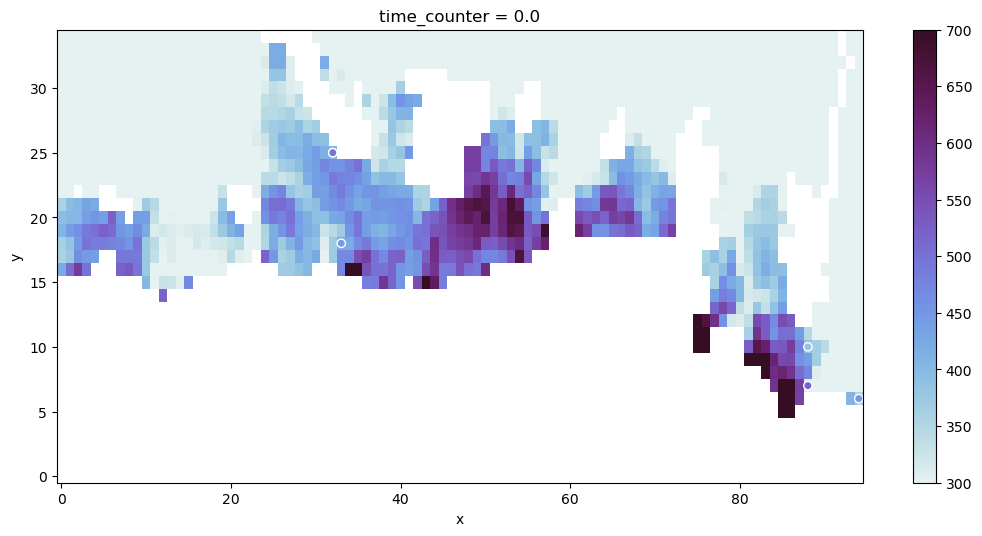

In [220]:
amundsen_salt1, amundsen_temp1 = load_am_TS(4)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(13,6), dpi=100)
amundsen_icedraft.plot(ax=ax, add_colorbar=False, vmin=300, vmax=700, cmap=cmocean.cm.dense)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=300, vmax=700, edgecolor='w')
plt.colorbar(sc)

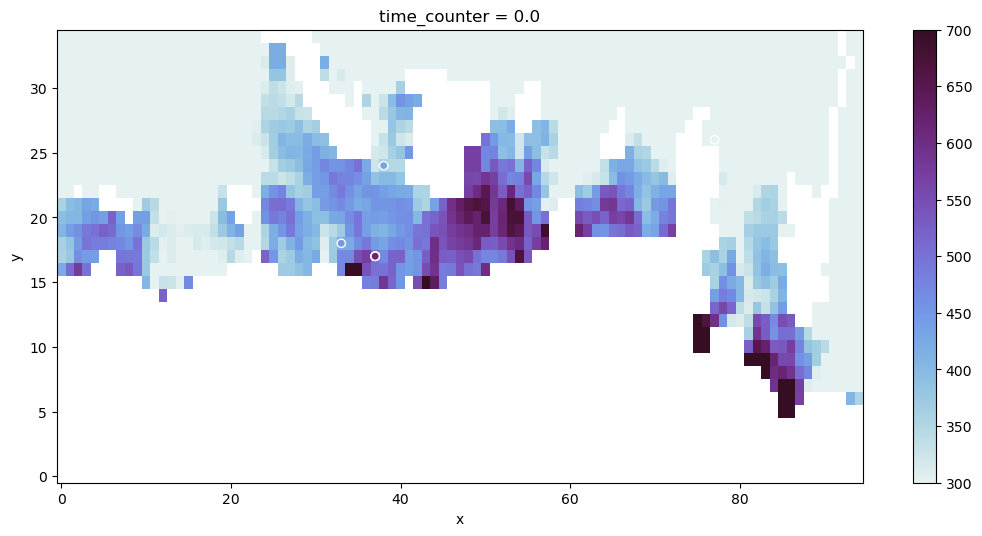

In [217]:
amundsen_salt1, amundsen_temp1 = load_am_TS(4)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(13,6), dpi=100)
amundsen_icedraft.plot(ax=ax, add_colorbar=False, vmin=300, vmax=700, cmap=cmocean.cm.dense)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=300, vmax=700, edgecolor='w')
plt.colorbar(sc)

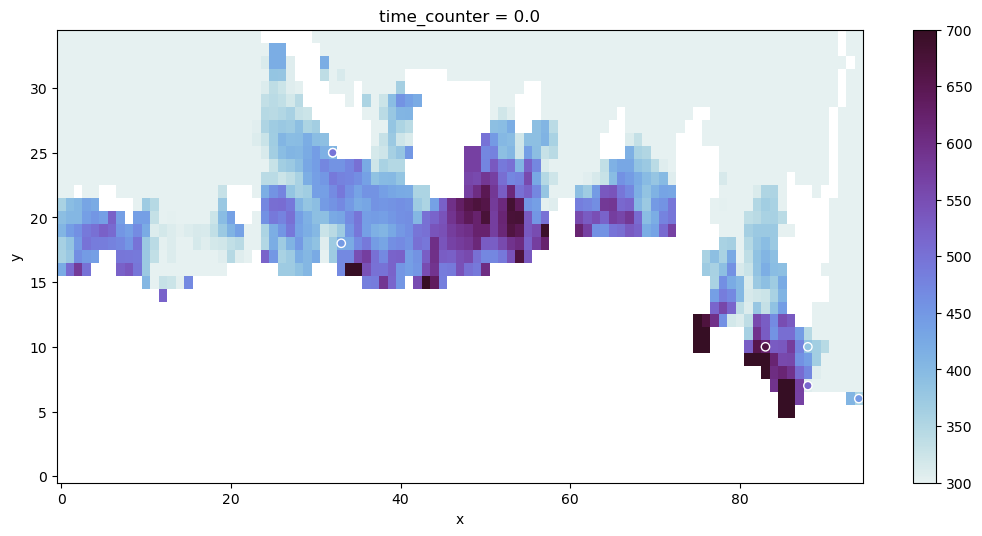

In [208]:
amundsen_salt1, amundsen_temp1 = load_am_TS(4)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(13,6), dpi=100)
amundsen_icedraft.plot(ax=ax, add_colorbar=False, vmin=300, vmax=700, cmap=cmocean.cm.dense)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=300, vmax=700, edgecolor='w')
plt.colorbar(sc)

Text(0.5, 0.98, 'Background is water column thickness')

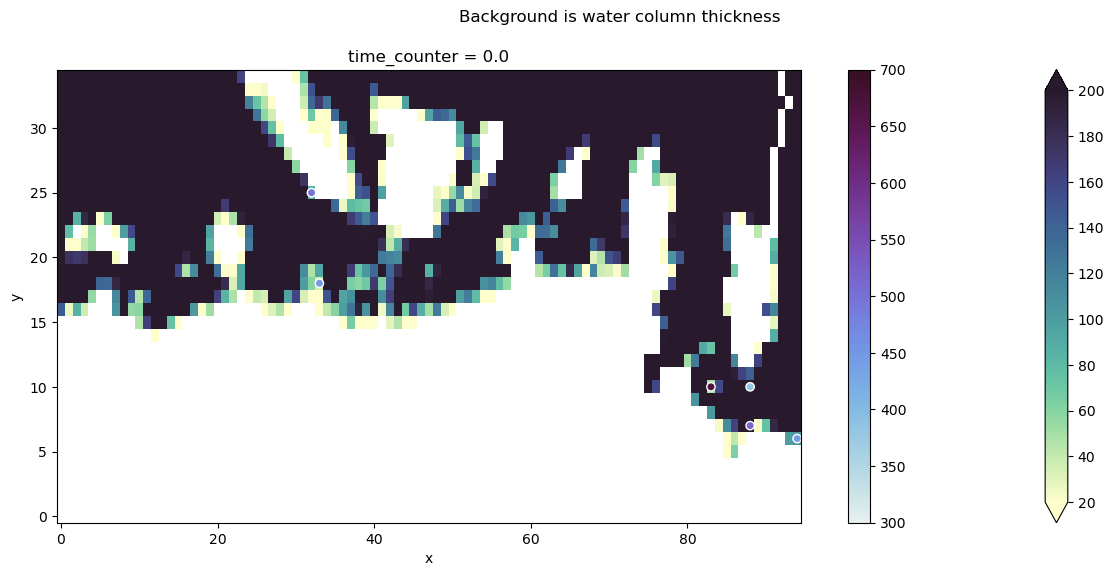

In [206]:
amundsen_salt1, amundsen_temp1 = load_am_TS(4)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(15,6), dpi=100)
(amundsen_bathy - amundsen_icedraft).plot(ax=ax, add_colorbar=True, vmin=20, vmax=200, cmap=cmocean.cm.deep)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=300, vmax=700, edgecolor='w')
plt.colorbar(sc)
fig.suptitle('Background is water column thickness')

Text(0.5, 0.98, 'Background is water column thickness')

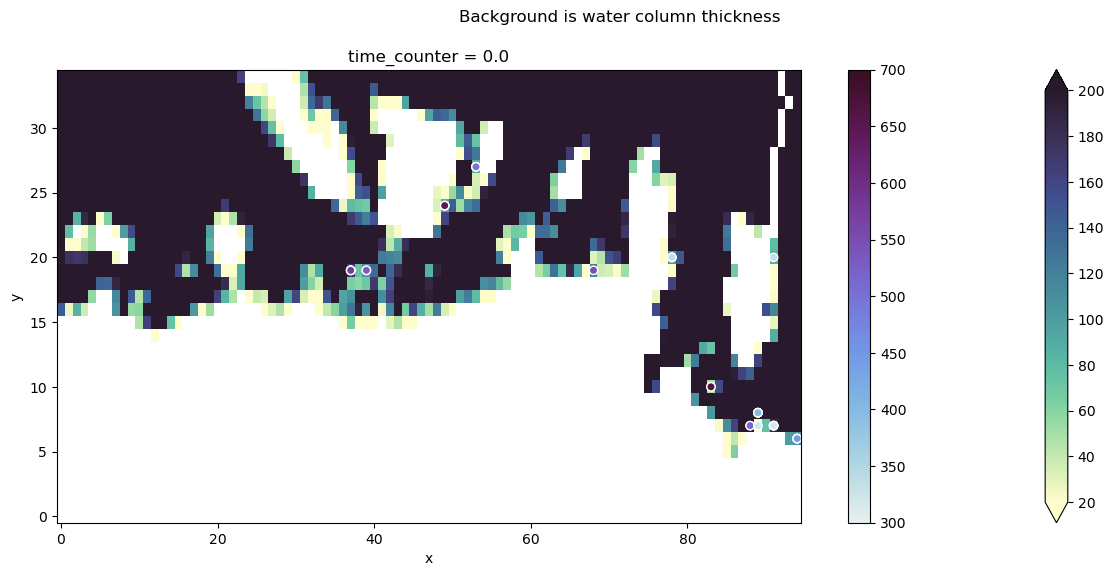

In [207]:
amundsen_salt1, amundsen_temp1 = load_am_TS(10)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(15,6), dpi=100)
(amundsen_bathy - amundsen_icedraft).plot(ax=ax, add_colorbar=True, vmin=20, vmax=200, cmap=cmocean.cm.deep)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=300, vmax=700, edgecolor='w')
plt.colorbar(sc)
fig.suptitle('Background is water column thickness')

Text(0.5, 0.98, 'Background is water column thickness')

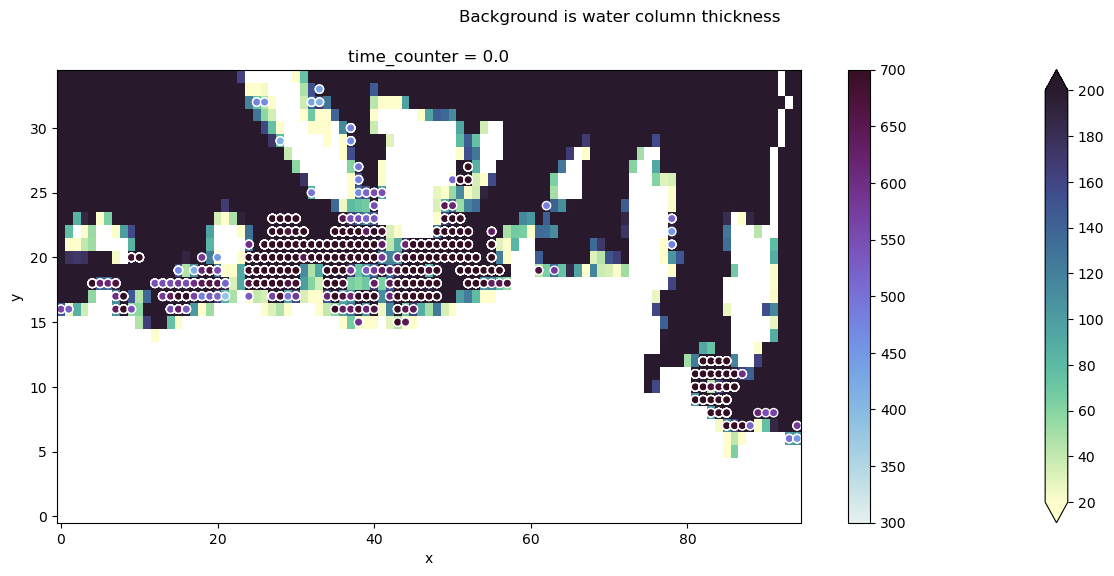

In [209]:
amundsen_salt1, amundsen_temp1 = load_am_TS(50)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(15,6), dpi=100)
(amundsen_bathy - amundsen_icedraft).plot(ax=ax, add_colorbar=True, vmin=20, vmax=200, cmap=cmocean.cm.deep)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=300, vmax=700, edgecolor='w')
plt.colorbar(sc)
fig.suptitle('Background is water column thickness')

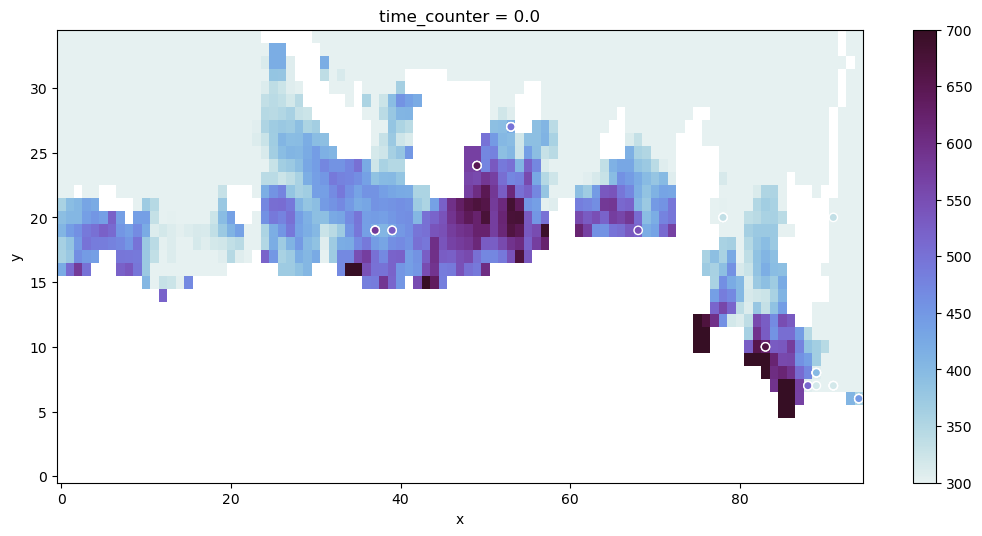

In [195]:
amundsen_salt1, amundsen_temp1 = load_am_TS(10)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(13,6), dpi=100)
amundsen_icedraft.plot(ax=ax, add_colorbar=False, vmin=300, vmax=700, cmap=cmocean.cm.dense)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=300, vmax=700, edgecolor='w')
plt.colorbar(sc)

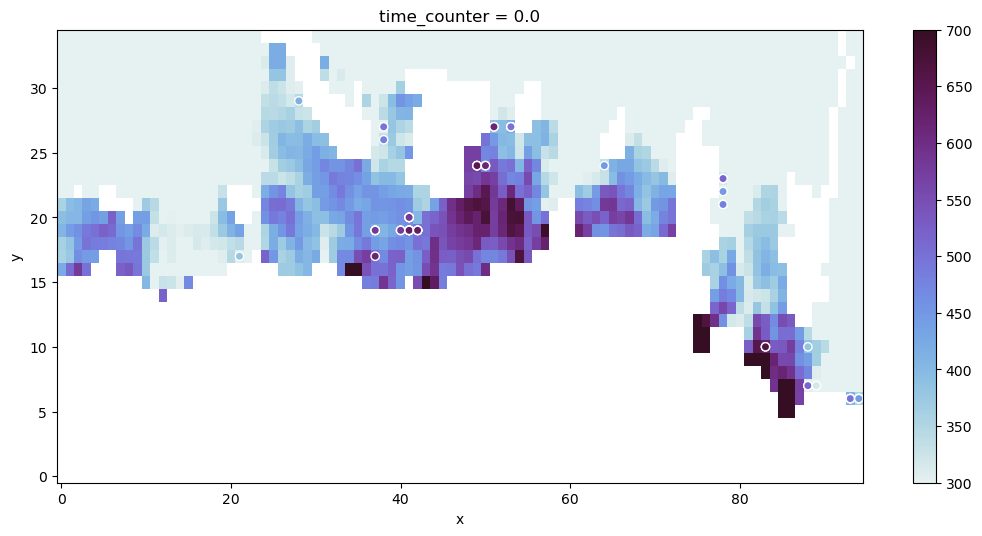

In [213]:
amundsen_salt1, amundsen_temp1 = load_am_TS(15)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(13,6), dpi=100)
amundsen_icedraft.plot(ax=ax, add_colorbar=False, vmin=300, vmax=700, cmap=cmocean.cm.dense)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=300, vmax=700, edgecolor='w')
plt.colorbar(sc)

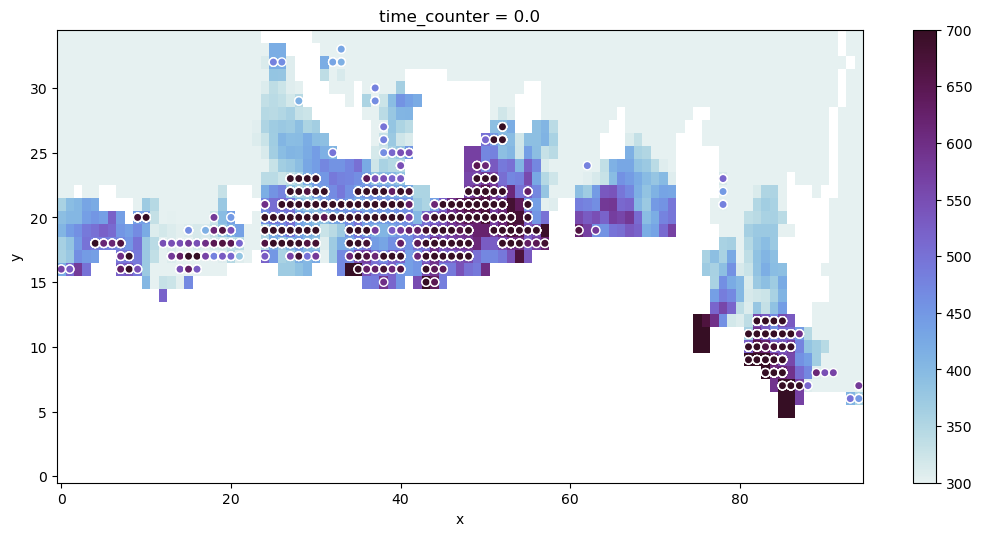

In [210]:
amundsen_salt1, amundsen_temp1 = load_am_TS(50)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(13,6), dpi=100)
amundsen_icedraft.plot(ax=ax, add_colorbar=False, vmin=300, vmax=700, cmap=cmocean.cm.dense)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=300, vmax=700, edgecolor='w')
plt.colorbar(sc)

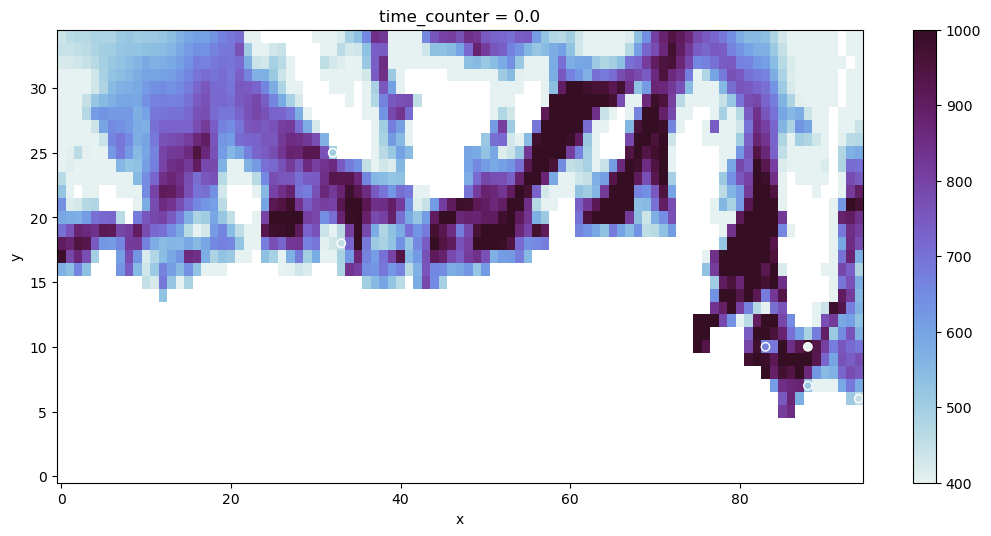

In [196]:
amundsen_salt1, amundsen_temp1 = load_am_TS(4)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(13,6), dpi=100)
amundsen_bathy.plot(ax=ax, add_colorbar=False, vmin=400, vmax=1000, cmap=cmocean.cm.dense)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=400, vmax=1000, edgecolor='w')
plt.colorbar(sc)

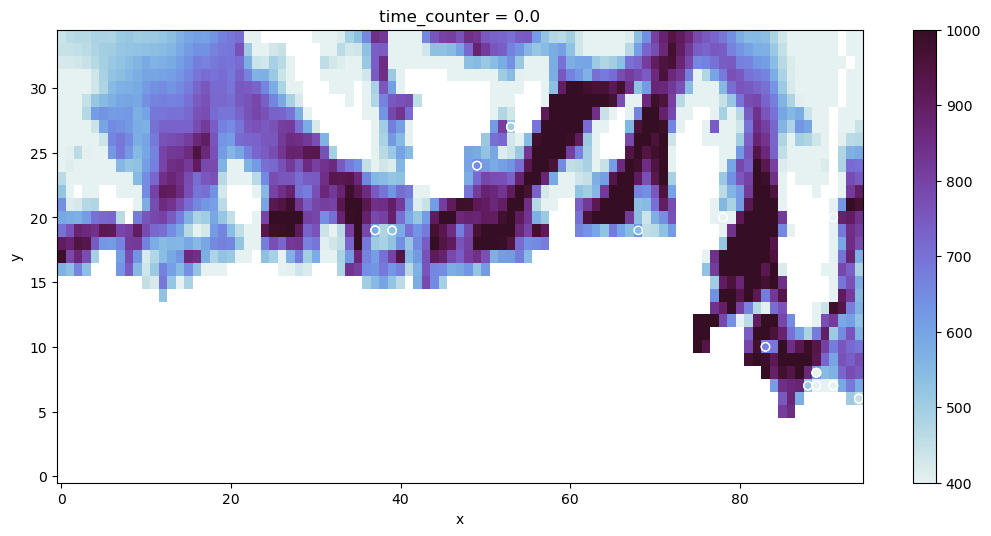

In [197]:
amundsen_salt1, amundsen_temp1 = load_am_TS(10)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(13,6), dpi=100)
amundsen_bathy.plot(ax=ax, add_colorbar=False, vmin=400, vmax=1000, cmap=cmocean.cm.dense)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=400, vmax=1000, edgecolor='w')
plt.colorbar(sc)

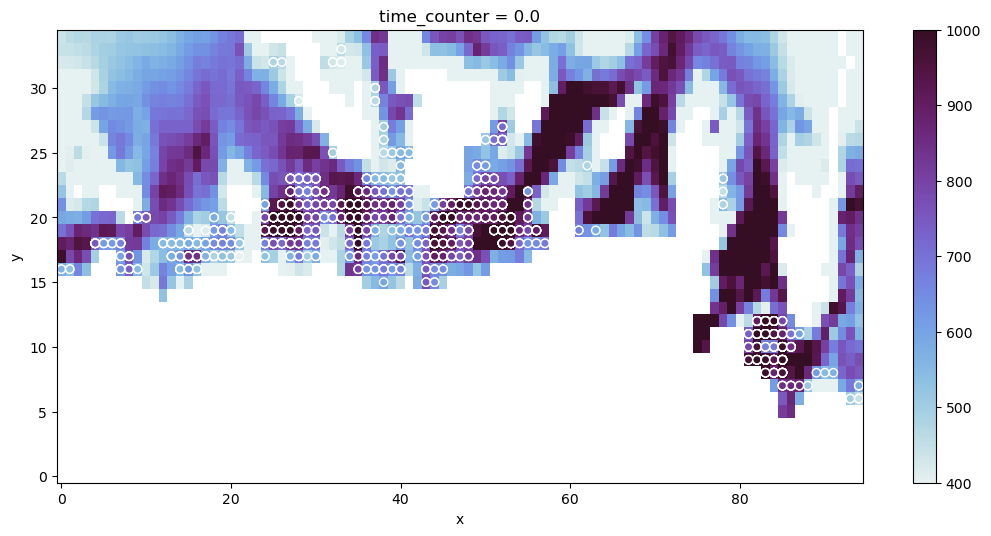

In [211]:
amundsen_salt1, amundsen_temp1 = load_am_TS(50)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(13,6), dpi=100)
amundsen_bathy.plot(ax=ax, add_colorbar=False, vmin=400, vmax=1000, cmap=cmocean.cm.dense)
depth_occurrences = np.array([nemo_mesh_ds.nav_lev.values[z] for z in occurrences[:,2]])
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=depth_occurrences, cmap=cmocean.cm.dense, vmin=400, vmax=1000, edgecolor='w')
plt.colorbar(sc)

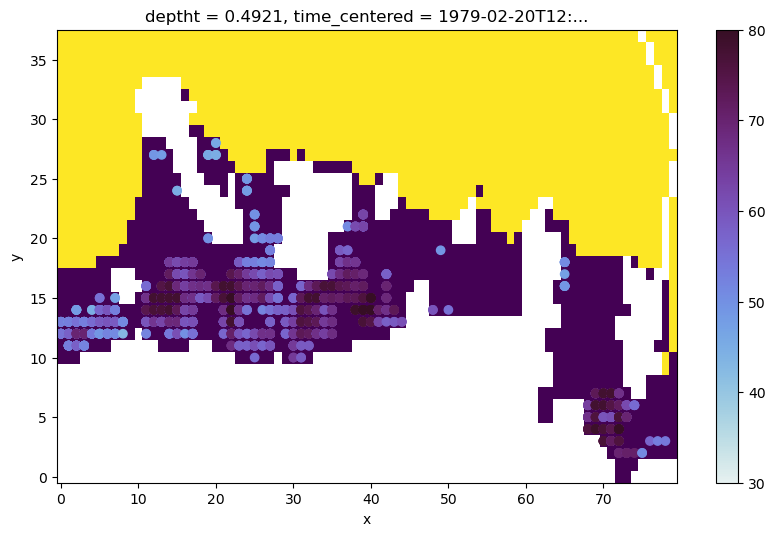

In [120]:
amundsen_salt1, amundsen_temp1 = load_am_TS(50)
amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
occurrences = np.argwhere((amundsen_B < Birgit).values)

fig, ax = plt.subplots(1,1, figsize=(10,6), dpi=100)
amundsen_salt1.isel(time_counter=0, deptht=0).plot(ax=ax, vmin=0, vmax=10, add_colorbar=False)
sc = ax.scatter(occurrences[:,1], occurrences[:,0], c=occurrences[:,2], cmap=cmocean.cm.dense, vmin=30, vmax=80)
plt.colorbar(sc)

In [95]:
for time_ind in range(0,100):
    amundsen_salt1, amundsen_temp1 = load_am_TS(time_ind)

    amundsen_B = (amundsen_temp1 - (amundsen_salt1*slope)).isel(time_counter=0)
    
    if (amundsen_B < Birgit).sum() != 0:
        occurrences = np.argwhere((amundsen_B < Birgit).values)
        print('Occurence at time index: ', time_ind)
        print('number of points with negative B: ', (amundsen_B < Birgit).sum().values)
        print('coords: ', occurrences)
        print('-----------------')
    
    
        # print('number of points with positive B: ', sum(amundsen_B >= Birgit))

Occurence at time index:  2
number of points with negative B:  1
coords:  [[ 2 75 51]]
-----------------
Occurence at time index:  3
number of points with negative B:  2
coords:  [[ 2 75 51]
 [13 20 47]]
-----------------
Occurence at time index:  4
number of points with negative B:  6
coords:  [[ 2 75 51]
 [ 5 70 60]
 [ 5 75 43]
 [13 20 47]
 [20 19 49]
 [20 19 50]]
-----------------
Occurence at time index:  5
number of points with negative B:  14
coords:  [[ 2 75 51]
 [ 2 78 37]
 [ 2 78 38]
 [ 2 78 39]
 [ 5 70 60]
 [ 5 75 43]
 [11 15 46]
 [13 26 50]
 [13 26 51]
 [13 26 52]
 [20 19 49]
 [20 19 50]
 [21 40 46]
 [24 39 41]]
-----------------
Occurence at time index:  6
number of points with negative B:  18
coords:  [[ 2 75 51]
 [ 2 78 36]
 [ 2 78 37]
 [ 2 78 38]
 [ 2 78 39]
 [ 5 70 60]
 [ 5 75 43]
 [11 15 46]
 [11 34 56]
 [13 26 51]
 [13 26 52]
 [14 26 51]
 [14 26 52]
 [14 55 53]
 [20 19 49]
 [20 19 50]
 [21 40 46]
 [24 39 41]]
-----------------
Occurence at time index:  7
number of poi

KeyboardInterrupt: 

(-0.5, 1.5)

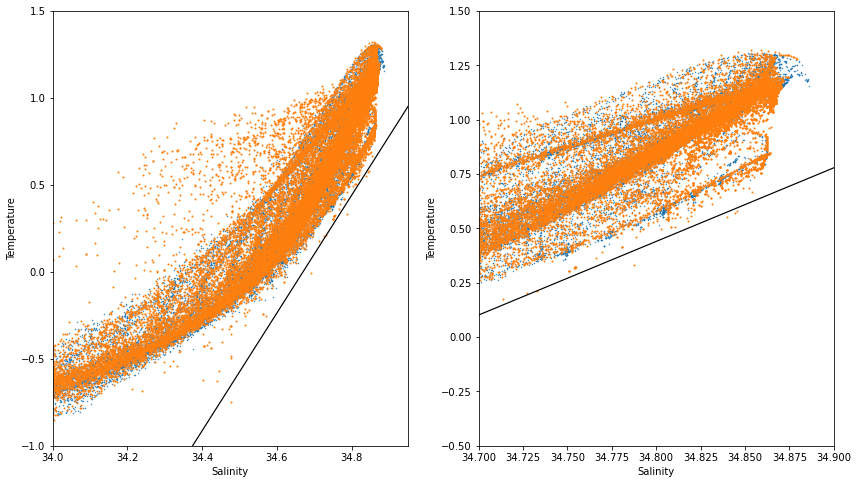

In [94]:
amundsen_salt1, amundsen_temp1 = load_am_TS(0)
amundsen_salt2, amundsen_temp2 = load_am_TS(4)

fig, ax = plt.subplots(1,2, figsize=(14,8))

for axis in ax.ravel():
    axis.scatter(amundsen_salt1, amundsen_temp1, s=0.2)
    axis.scatter(amundsen_salt2, amundsen_temp2, s=1)
    axis.plot(Sgrid, Tgrid,'-k',linewidth=1.2)
    axis.set_xlabel('Salinity')
    axis.set_ylabel('Temperature')

ax[0].set_xlim(34,34.95)
ax[0].set_ylim(-1.0,1.5)
ax[1].set_xlim(34.7,34.9)
ax[1].set_ylim(-0.5,1.5)